AlexNet - ADLI

In [63]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
data_dir = r"D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data" 
data = tf.keras.utils.image_dataset_from_directory(data_dir,seed=123,image_size=(180,180), batch_size=16)
print(data.class_names)

class_names = data.class_names

Found 300 files belonging to 3 classes.
['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']


In [64]:
img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size = (img_size,img_size),
    batch_size = batch,
)

Found 300 files belonging to 3 classes.


In [65]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images: 10
Train Images: 9
Validation Images: 1


In [66]:
from PIL import Image
import os

def convert_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Pastikan format yang valid
                try:
                    image_path = os.path.join(root, file)
                    with Image.open(image_path) as img:
                        new_image_path = image_path.replace(file, file.split('.')[0] + '.jpg')
                        img.convert('RGB').save(new_image_path, 'JPEG')  # Mengonversi gambar ke JPEG
                        print(f"Converted: {image_path} -> {new_image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

base_dir = r'D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data'
convert_images(base_dir)

Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA1.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA1.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA10.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA10.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA100.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA100.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA11.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA11.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam

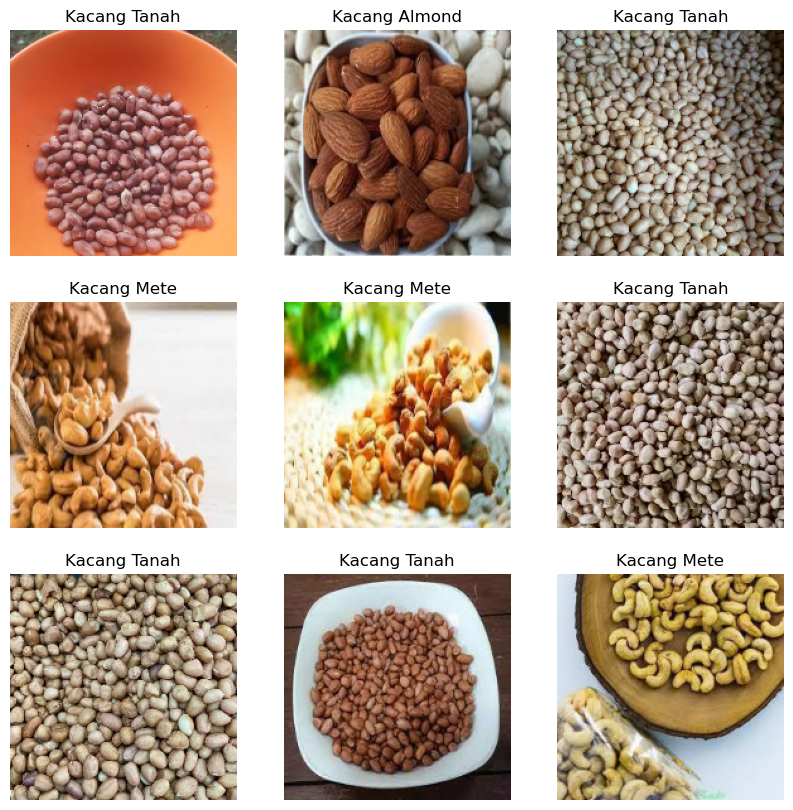

In [67]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [68]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


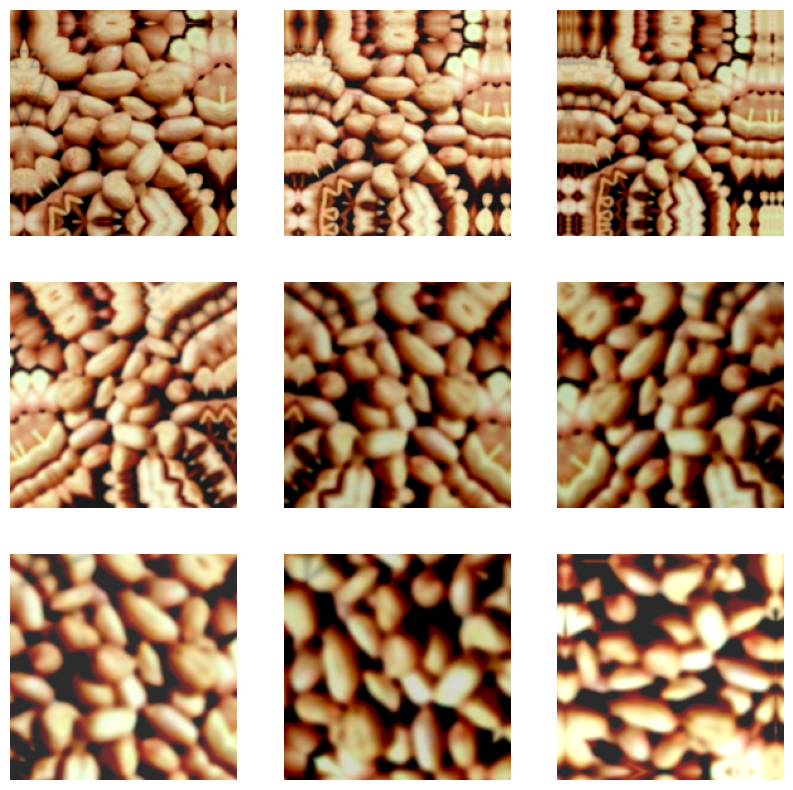

In [69]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [70]:
from PIL import Image
import os

def convert_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Pastikan format yang valid
                try:
                    image_path = os.path.join(root, file)
                    with Image.open(image_path) as img:
                        new_image_path = image_path.replace(file, file.split('.')[0] + '.jpg')
                        img.convert('RGB').save(new_image_path, 'JPEG')  # Mengonversi gambar ke JPEG
                        print(f"Converted: {image_path} -> {new_image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

base_dir = r'D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data'
convert_images(base_dir)

Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA1.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA1.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA10.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA10.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA100.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA100.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA11.jpg -> D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA11.jpg
Converted: D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam

In [71]:
import tensorflow as tf
import keras
import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, Dropout

# Membuat model AlexNet from scratch
def alexnet(input_shape, n_classes):
    
    input = Input(input_shape)
    
    # Layer 1
    x = Conv2D(96, (11, 11), strides=4, activation='relu')(input)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)
    
    # Layer 2
    x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)
    
    # Layer 3
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    
    # Layer 4
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    
    # Layer 5
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)
    
    # Fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output layer
    output = Dense(n_classes, activation='softmax')(x)
    
    # Membuat model
    model = Model(inputs=input, outputs=output)
    return model

# Pastikan input shape dan jumlah kelas sesuai
input_shape = (180, 180, 3)  # Resolusi gambar Anda
n_classes = 2  # Jumlah kelas (misalnya: kacang tanah dan kacang mete)

# Clear cache Keras menggunakan clear session
K.clear_session()

# Membuat model AlexNet
model = alexnet(input_shape, n_classes)

# Menampilkan summary dari model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,318,018 (142.36 MB)

 Trainable params: 37,318,018 (142.36 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Model AlexNet dengan Sequential
model = Sequential([
    # Layer 1: Convolution + MaxPooling
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(180, 180, 3)),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    # Layer 2: Convolution + MaxPooling
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    # Layer 3: Convolution
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    
    # Layer 4: Convolution
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    
    # Layer 5: Convolution + MaxPooling
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    # Flatten before fully connected layers
    Flatten(),
    
    # Fully connected layers
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(3, activation='softmax')  # Jumlah kelas: 3
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Buat EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

# Fit model
history = model.fit(
    train_ds, 
    epochs=30, 
    validation_data=val_ds, 
    callbacks=[early_stopping]
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3965 - loss: 7.3794 - val_accuracy: 0.4167 - val_loss: 1.2820
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3488 - loss: 1.7135 - val_accuracy: 0.6667 - val_loss: 0.8795
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4479 - loss: 1.1557 - val_accuracy: 0.7500 - val_loss: 0.7952
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6836 - loss: 0.7921 - val_accuracy: 0.7500 - val_loss: 0.9462
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6488 - loss: 0.7946 - val_accuracy: 0.5833 - val_loss: 0.8338
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7385 - loss: 0.6202 - val_accuracy: 0.5833 - val_loss: 0.6658
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7773 - loss: 0.5918 - val_accuracy: 0.7500 - val_loss: 0.6050
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7451 - loss: 0.5821 - val_accuracy: 0.7500 - val_loss: 0.5683


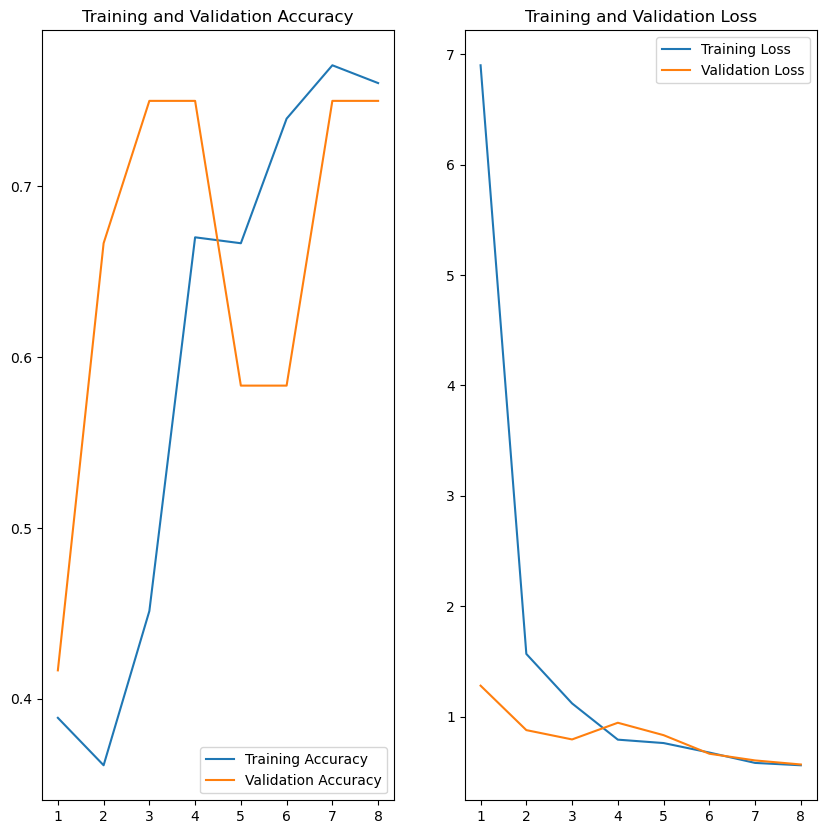

In [73]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
model.save('BestModel_AlexNet_Numpy.h5')

In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'BestModel_AlexNet_Numpy.h5')  # Ganti dengan path model Anda
class_names = ['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
result = classify_images(r'D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data\Kacang Almond\KA3.jpg', save_path='kacang almond.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Prediksi: Kacang Almond
Confidence: 46.19%
Prediksi: Kacang Almond dengan confidence 46.19%. Gambar asli disimpan di kacang almond.jpg.


Found 30 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


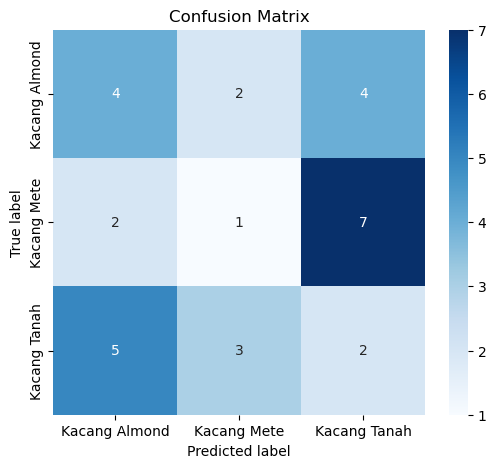

Confusion Matrix:
 [[4 2 4]
 [2 1 7]
 [5 3 2]]
Akurasi: 0.23333333333333334
Presisi: [0.36363636 0.16666667 0.15384615]
Recall: [0.4 0.1 0.2]
F1 Score: [0.38095238 0.125      0.17391304]


In [80]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Matakuliah Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"], yticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())